In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### args manipulations

In [2]:
lt_logs_df = pd.read_csv('./logs/calmip_logs.csv', index_col = 0)
from types import SimpleNamespace
mock_args = SimpleNamespace(**lt_logs_df.loc[471].to_dict())

In [6]:

mock_args
from exp.exp_long_term_forecasting import Exp_Long_Term_Forecast
exp = Exp_Long_Term_Forecast(mock_args)
exp.train(setting = 'test')

Use GPU: cuda:0


FileNotFoundError: [Errno 2] No such file or directory: '/tmpdir/arnaud/dataset/USC/seq16_pred16_X.npy'

### Exp management

In [23]:
base_exps = [{'id' : f"id_{i}",'values':np.random.randint(0,10, size=(1,)), 'factor':np.round(np.random.randint(50,100)/100,3), 'alive': True} for i in range(20)]
for exp in base_exps :
    exp['th_values'] = [exp['values'][0] * exp['factor']** i for i in range(20)]
base_exps[0]

{'id': 'id_0',
 'values': array([7]),
 'factor': 0.94,
 'alive': True,
 'th_values': [7.0,
  6.58,
  6.1852,
  5.814087999999999,
  5.465242719999999,
  5.137328156799998,
  4.829088467391998,
  4.539343159348478,
  4.266982569787569,
  4.010963615600315,
  3.7703057986642956,
  3.5440874507444375,
  3.3314422036997713,
  3.131555671477785,
  2.9436623311891177,
  2.7670425913177707,
  2.601020035838704,
  2.444958833688382,
  2.2982613036670787,
  2.160365625447054]}

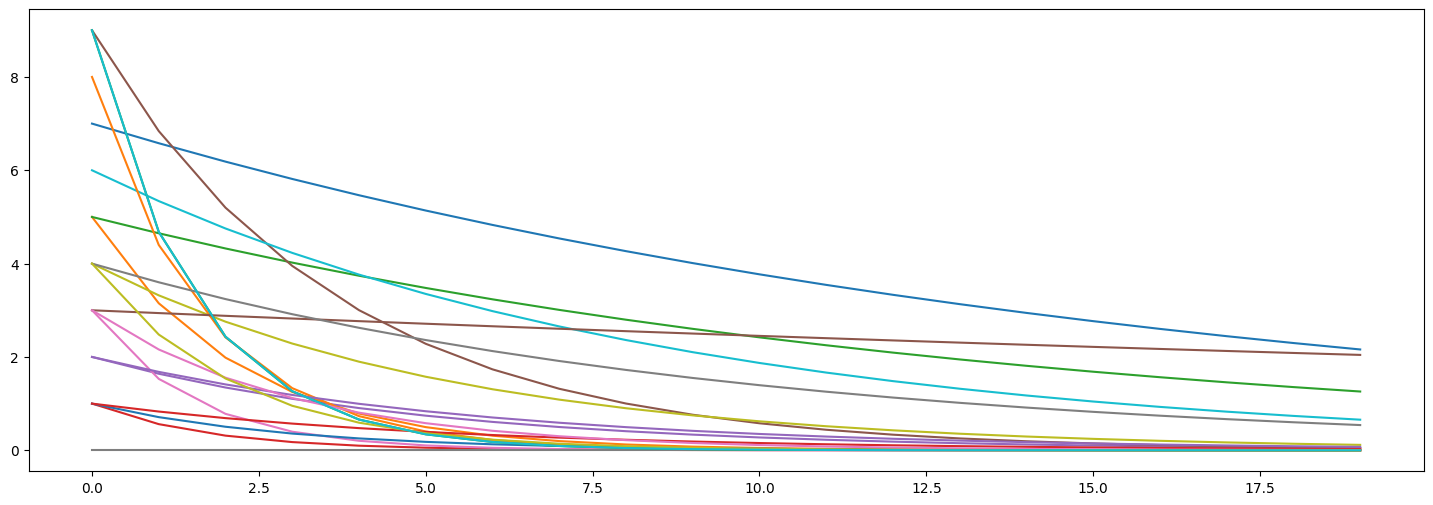

In [24]:
fig, ax = plt.subplots(1,1,figsize = (18,6))
for exp in base_exps :
    ax.plot(exp['th_values'])

In [ ]:
exps = base_exps.copy()
pruning_steps = 4
max_epochs = 20
pruning_factor = 0.5
n_iter = max_epochs // pruning_steps
for iter in range(n_iter):
    scores = []
    for exp in exps :
        for k in range(pruning_steps):
            new_value = exp['values'][-1] * exp['factor'] if exp['alive'] else np.nan
            exp['values'] = np.append(exp['values'], new_value)
        scores.append(exp['values'][-1])
    scs = pd.Series(scores, index = [exp['id'] for exp in exps])
    scs = scs.sort_values(ascending = False)
    n_exp_to_keep = int(scs.dropna().shape[0] * pruning_factor)
    keep_thres = scs.iloc[n_exp_to_keep]
    print(f"Iter n° {iter + 1} - threshold = {keep_thres:.2e}")
    for exp in exps :
        if exp['values'][-1] < keep_thres :
            exp['alive'] = False
            print(f"    killing exp {exp['id']} with a score of {exp['values'][-1]:.2e}")
scs

Iter n° 1 - threshold = 7.88e-01
    killing exp id_3 with a score of 9.83e-02
    killing exp id_6 with a score of 2.03e-01
    killing exp id_7 with a score of 0.00e+00
    killing exp id_10 with a score of 2.54e-01
    killing exp id_11 with a score of 7.32e-01
    killing exp id_12 with a score of 6.58e-01
    killing exp id_13 with a score of 4.75e-01
    killing exp id_18 with a score of 5.91e-01
    killing exp id_19 with a score of 6.58e-01
10 0.78764805
Iter n° 2 - threshold = 1.00e+00
    killing exp id_1 with a score of 1.24e-01
    killing exp id_4 with a score of 4.09e-01
    killing exp id_8 with a score of 9.01e-01
    killing exp id_14 with a score of 4.96e-01
    killing exp id_16 with a score of 2.17e-01
5 1.0017313087094786
Iter n° 3 - threshold = 1.48e+00
    killing exp id_5 with a score of 3.34e-01
    killing exp id_17 with a score of 1.13e+00
3 1.4819424213915733
Iter n° 4 - threshold = 1.57e+00
    killing exp id_9 with a score of 9.30e-01
2 1.565659008540007
I

id_0     2.030744
id_15    2.002824
id_2     1.171194
id_1          NaN
id_3          NaN
id_4          NaN
id_5          NaN
id_6          NaN
id_7          NaN
id_8          NaN
id_9          NaN
id_10         NaN
id_11         NaN
id_12         NaN
id_13         NaN
id_14         NaN
id_16         NaN
id_17         NaN
id_18         NaN
id_19         NaN
dtype: float64

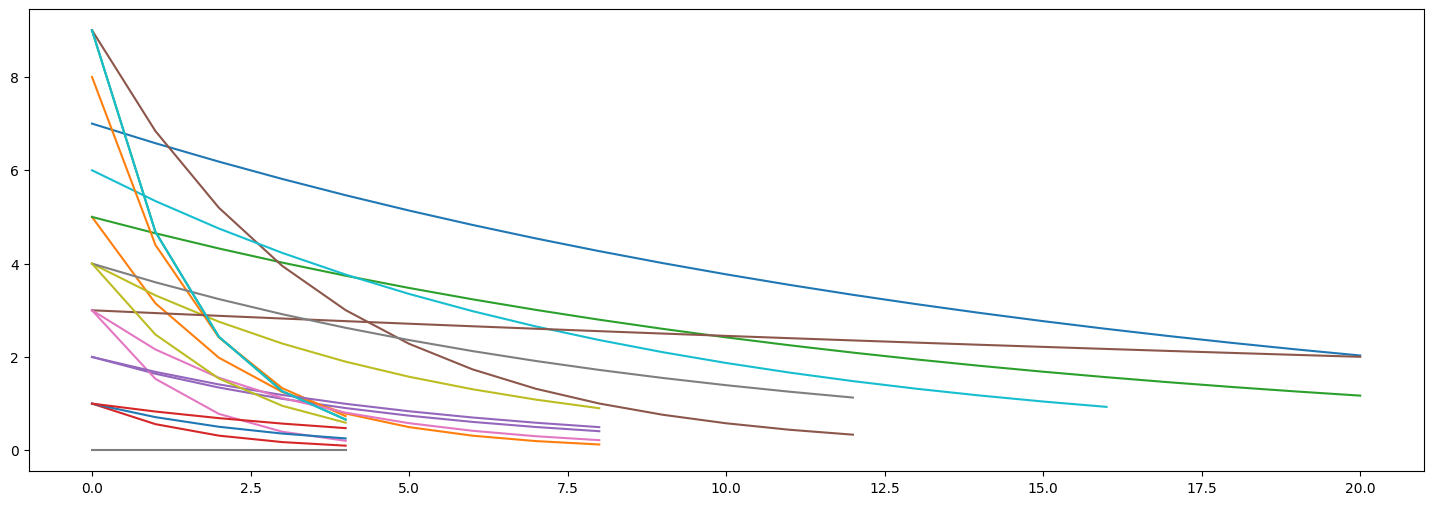

In [26]:
fig, ax = plt.subplots(1,1,figsize = (18,6))
for exp in exps :
    ax.plot(exp['values'])